In [1]:
import os
import sys
from pathlib import Path
import warnings
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import yaml
import importlib
import numpy as np
import gvar as gv
import pprint
cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)
# If your notebook is in a subdirectory of the project root, you can modify the path accordingly:
# project_root = cwd.parent  # Go up one directory level
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

# local imports 
import priors as priors
import i_o as i_o
import fit_model as fit_model
import fit_comparison as compare 
import xi_fit as xi_fit
import analyze
import lsqfitics
import get_models
import read_data

warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')
data_dir = os.path.join(project_root, "data")
hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")
data_path_input = os.path.join(data_dir, "input_data.h5")


/home/grant/callat


In [2]:
import lsqfitics
import lsqfitics.src.lsqfitics.nonlinear_fit as nlf

In [3]:
gv.load(data_dir+'/scale_setting.p')
# gv.load(data_dir+'/a_fm_results.p')


{'w0_org:a06': 2.988(14),
 'w0_org:a09': 1.9440(66),
 'w0_org:a12': 1.4101(33),
 'w0_org:a15': 1.1451(13),
 'w0_org:w0': 0.1709(12),
 't0_org:a06': 6.587(25),
 't0_org:a09': 3.0384(79),
 't0_org:a12': 1.7570(33),
 't0_org:a15': 1.2375(15),
 't0_org:sqrt_t0': 0.1422(14),
 'w0_imp:a06': 2.998(14),
 'w0_imp:a09': 1.9552(65),
 'w0_imp:a12': 1.4157(33),
 'w0_imp:a15': 1.1341(15),
 'w0_imp:w0': 0.1709(12),
 't0_imp:a06': 6.235(27),
 't0_imp:a09': 2.7141(83),
 't0_imp:a12': 1.4692(32),
 't0_imp:a15': 0.9919(13),
 't0_imp:sqrt_t0': 0.1422(11)}

In [4]:
from importlib import reload
reload(i_o)
reload(fit_model)
reload(priors)
reload(get_models)
reload(xi_fit)
strange = '2'
all_models = get_models.GenerateModels(strange='2')
all = all_models.generate_model_names()
pprint.pprint(all.keys())

dict_keys(['xi_st:l_0:conv_fact_False', 'xi_st:l_1:conv_fact_False', 'xi_st:l_3:conv_fact_False', 'xi_st:d_1:l_0:conv_fact_False', 'xi_st:d_1:l_1:conv_fact_False', 'xi_st:d_1:l_3:conv_fact_False', 'xi_st:d_3:l_0:conv_fact_False', 'xi_st:d_3:l_1:conv_fact_False', 'xi_st:d_3:l_3:conv_fact_False', 'xi_st:s_1:l_0:conv_fact_False', 'xi_st:s_1:l_1:conv_fact_False', 'xi_st:s_1:l_3:conv_fact_False', 'xi_st:s_1:d_1:l_0:conv_fact_False', 'xi_st:s_1:d_1:l_1:conv_fact_False', 'xi_st:s_1:d_1:l_3:conv_fact_False', 'xi_st:s_1:d_3:l_0:conv_fact_False', 'xi_st:s_1:d_3:l_1:conv_fact_False', 'xi_st:s_1:d_3:l_3:conv_fact_False', 'xi_st:s_3:l_0:conv_fact_False', 'xi_st:s_3:l_1:conv_fact_False', 'xi_st:s_3:l_3:conv_fact_False', 'xi_st:s_3:d_1:l_0:conv_fact_False', 'xi_st:s_3:d_1:l_1:conv_fact_False', 'xi_st:s_3:d_1:l_3:conv_fact_False', 'xi_st:s_3:d_3:l_0:conv_fact_False', 'xi_st:s_3:d_3:l_1:conv_fact_False', 'xi_st:s_3:d_3:l_3:conv_fact_False', 'xi_st:l_0:x_2:conv_fact_False', 'xi_st:l_1:x_2:conv_fact_Fals

### Fitting the $\Xi$ system in physical units, fitting in MeV units ###

In [5]:
# pprint.pprint(all)
from importlib import reload

# reload(fit_model)
reload(read_data)
reload(priors)
model_data = {}
units = 'phys'
    # Conditionally load data and prior based on 'units'
_data = read_data.InputOutput(units='phys', strange=strange,scale_corr='full',conversion_factor= False)
data,prior,phys_pt_data,ensembles = _data.get_data_and_prior_for_unit()
temp = _data._get_bs_data()
mpi = gv.dataset.avg_data({ens:v['m_pi'] for ens,v in temp.items()},bstrap=True)
units = {ens:v['units'] for ens,v in temp.items()}
print(gv.tabulate({ens: mpi[ens]*units[ens] for ens in mpi}))


m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)})} gvvv
m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)}), 'a09m135': BufferDict({'m_pi': 134.2(1.1), 'm_k': 493.2(4.1), 'lam_chi': 1157(10), 'eps_pi': 261.8(2.3), 'm_xi': 1280(12), 'm_xi_st': 1524(16), 'eps2_a': 0.065325(70), 'L': 64.000000(64), 'units': 2257(19)})} gvvv
m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)}), 'a09m135': Buffe

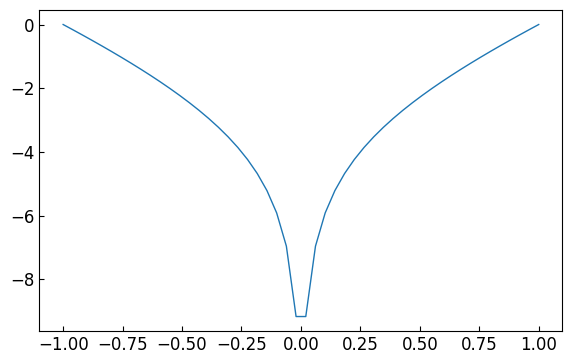

In [6]:
import non_analytic_functions as naf 
# naf.fcn_F(0.1,0.01)
# naf.fcn_J(0.1,0.01)
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1)
y = naf.fcn_R(x**2)

fig, ax = plt.subplots()
ax.plot(x, y)

In [7]:
model_info_cvt = all['xi_st:l_3:x_3:conv_fact_False'] 

reload(priors)
reload(analyze)
reload(fit_model)
print(model_info_cvt)
_fit_model = fit_model.FitModel(
        data = data,
        prior = prior,
        phys_pt_data=phys_pt_data,
        model_info=model_info_cvt,
        strange='2')
print(_fit_model.fit)
fit_out = analyze.Analyze(fit_instance=_fit_model)
# print(fit_out.fit)
print(fit_out.extrapolation())
# fit_out.plot_params(observables=['xi_st'])

{'order_chiral': 3, 'order_strange': 0, 'order_disc': 0, 'order_light': 3, 'particles': ['xi_st'], 'units': 'phys', 'conversion_factor': False}
Least Square Fit:
  chi2/dof [dof] = 7.7 [17]    Q = 1.7e-19    logGBF = -127.32

Parameters:
    m_{xi_st,0}           1816 (77)        [  1.30(40)e+03 ]  *
     s_{xi,bar}          -2.47 (64)        [       0 ± 2.0 ]  *
    b_{xi_st,4}          14.6 (3.5)        [       0 ± 5.0 ]  **
    B_{xi_st,4}   -4.2858e-12 ± 2.0        [       0 ± 2.0 ]  
g_{xi_st,xi_st}          -0.68 (14)        [    -0.73 (14) ]  
   g_{xi_st,xi}           0.90 (13)        [     0.69 (14) ]  *
       m_{xi,0}           1100 (81)        [  1.10(40)e+03 ]  
    a_{xi_st,4}          -2.9 (1.8)        [       0 ± 2.0 ]  *
         s_{xi}          -0.2 (2.0)        [       0 ± 2.0 ]  
          m_k 0         539.7 (4.7)        [   560.9 (5.2) ]  ****
              1         476.3 (3.8)        [   493.2 (4.1) ]  ****
              2         498.5 (3.9)        [   516.2 (4

In [8]:
# info = all['xi:xi_st:s_1:d_3:l_3:conv_fact_True']
import copy
import tqdm
reload(i_o)
reload(fit_model)
reload(analyze)
reload(priors)
reload(read_data)
units = 'phys'
all_fits = {}
all_models = {}
error_models = []
reload(analyze)
extrap_values = {}
avg_out = {}
# model_names = [
#     'xi:xi_st:s_3:d_1:l_0:x_2:conv_fact_False',
#     'xi:xi_st:s_3:d_1:l_1:x_2:conv_fact_False',
#     'xi:xi_st:s_3:d_3:l_0:x_2:conv_fact_False',
#     'xi:xi_st:s_3:d_3:l_1:x_2:conv_fact_False',
#     'xi:xi_st:s_3:d_1:l_0:x_3:conv_fact_False',
#     'xi:xi_st:s_3:d_1:l_1:x_3:conv_fact_False',
#     'xi:xi_st:s_3:d_1:l_3:x_3:conv_fact_False',
#     'xi:xi_st:s_3:d_3:l_0:x_3:conv_fact_False',
#     'xi:xi_st:s_3:d_3:l_1:x_3:conv_fact_False',
#     'xi:xi_st:s_3:d_3:l_3:x_3:conv_fact_False',
# ]

# Output the list
# print(model_names)

# for models,info in all.items():
#     _fit_model = fit_model.FitModel(data,prior,phys_pt_data,model_info=info,strange='2')

for models,info in all.items():
    for sc in ['full']:
        _data = read_data.InputOutput(units='phys', strange=strange,scale_corr=sc,conversion_factor= False)
        data,prior,phys_pt_data,ensembles = _data.get_data_and_prior_for_unit()
    
        copied_data = copy.deepcopy(data)
        copied_prior = copy.deepcopy(prior)
        copied_phys_pt_data = copy.deepcopy(phys_pt_data)
        copied_model_info = copy.deepcopy(info)
            # Create a new FitModel instance for each scale_corr option
        _fit_model = fit_model.FitModel(
            data = copied_data,
            prior = copied_prior,
            phys_pt_data=copied_phys_pt_data,
            model_info=copied_model_info,
            strange='2'
        )
        all_models[models+str(sc)] = _fit_model
        fit_result = _fit_model.fit
        all_fits[models+str(sc)] = fit_result
# %store all_fits
        fit_out = analyze.Analyze(fit_instance=_fit_model)
        print(models)
        print(fit_out.extrapolation())
        print(fit_out.fit)
        # print(fit_result)
        # print(fit_out.extrapolation())

%store all_fits
        
    
# _fit_model = fit_model.FitModel(data,prior,phys_pt_data,model_info=info,strange='2')
# print(_fit_model.fit)

m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)})} gvvv
m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)}), 'a09m135': BufferDict({'m_pi': 134.2(1.1), 'm_k': 493.2(4.1), 'lam_chi': 1157(10), 'eps_pi': 261.8(2.3), 'm_xi': 1280(12), 'm_xi_st': 1524(16), 'eps2_a': 0.065325(70), 'L': 64.000000(64), 'units': 2257(19)})} gvvv
m_pi True
m_k True
lam_chi True
eps_pi True
{'a06m310L': BufferDict({'m_pi': 327.3(3.0), 'm_k': 560.9(5.2), 'lam_chi': 1321(13), 'eps_pi': 857.7(8.3), 'm_xi': 1407(13), 'm_xi_st': 1639(19), 'eps2_a': 0.029618(41), 'L': 72.000000(72), 'units': 3461(32)}), 'a09m135': Buffe

KeyboardInterrupt: 

In [ ]:
test = all_fits['xi:xi_st:s_1:d_1:l_1:x_2:conv_fact_Falsefull']
fit_out = analyze.Analyze(fit_instance=test)
print(fit_out)
print(fit_out.extrapolation())
print(fit_out.fit)

KeyError: 'xi:xi_st:s_1:d_1:l_1:x_2:conv_fact_Falsefull'

In [ ]:
reload(fit_model)
weighted_fits = lsqfitics.sort(all_fits,'logGBF',cutoff=0.01)
model_weights = lsqfitics.calculate_weights(weighted_fits,'logGBF')
print(weighted_fits)
truncated_models = {}
for mdl in all_models.keys():
    if mdl in weighted_fits.keys():
        truncated_models[mdl] = all_models[mdl]

for m in truncated_models:
    # print(m,'\n',truncated_models[m].fit)
    print(m)

reload(analyze)
extrap_values = {}
avg_out = {}
analyze_instances = {name: analyze.Analyze(fit_instance=_fit_instance) for name, _fit_instance in truncated_models.items()}
print('analy',analyze_instances)

# for name, _fit_instance in analyze_instances.items():
#     # print(_fit_instance.shift_latt_to_phys(phys_params=['eps2_a','d_eps2_s','lam_chi','m_pi'], observable='xi',debug=True))
#     print('\n')
#     print('extrapolation as fcn of pion mass')
#     _fit_instance.plot_params(xparam='epi',observables=['xi','xi_st'],eps=False)
#     # _fit_instance.plot_params(xparam='epi',observable='xi_st',eps=False)

#     print('extrapolation as fcn of lattice spacing') 

for name, analyze_instance in analyze_instances.items():
    extrap_values[name] = analyze_instance.extrapolation()
    for part in ['xi','xi_st']:
        avg_out[part] = lsqfitics.calculate_average(values=extrap_values[name][part],weights=model_weights)

print(avg_out)

df = analyze.to_pandas(extrap_values,model_weights)
df_top = df.head(3) 
print(df_top)

{'xi:xi_st:s_3:d_3:l_3:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f658edffcd0>, 'xi:xi_st:s_3:d_3:l_0:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f658ee07dd0>, 'xi:xi_st:s_3:d_3:l_1:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f658ec94f50>, 'xi:xi_st:s_1:d_3:l_3:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f658f17d8d0>, 'xi:xi_st:s_1:d_3:l_1:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f6595503310>, 'xi:xi_st:s_1:d_3:l_0:conv_fact_Falsefull': <lsqfit._extras.unchained_nonlinear_fit object at 0x7f658f0c28d0>}
xi:xi_st:s_1:d_3:l_0:conv_fact_Falsefull
xi:xi_st:s_1:d_3:l_1:conv_fact_Falsefull
xi:xi_st:s_1:d_3:l_3:conv_fact_Falsefull
xi:xi_st:s_3:d_3:l_0:conv_fact_Falsefull
xi:xi_st:s_3:d_3:l_1:conv_fact_Falsefull
xi:xi_st:s_3:d_3:l_3:conv_fact_Falsefull
analy {'xi:xi_st:s_1:d_3:l_0:conv_fact_Falsefull': <analyze.Analyze object at 0x7f658e7

In [ ]:
reload(i_o)
reload(analyze)
reload(fit_model)

units_list = ['phys']
discard_cov_opt = [True,False] # this option either retains the correlations between the pseudoscalars (scale setting params) or removes them # 
model_data = {}
test_mdl_key = 'xi:xi_st:s_3:d_3:l_3:conv_fact_Falsefull'

for unit in units_list:
    data, new_prior, phys_point_data = i_o.get_data_and_prior_for_unit(unit,system='xi',scheme='w0_imp',convert_data=False,decorr_scale=None)
    
    _model_info = xi_models[test_mdl_key].copy()
    _model_info['units'] = unit
    updated_mdl_key = i_o.update_model_key_name(test_mdl_key, unit)
# print(f"Processing: {updated_mdl_key}")  
    for dc in discard_cov_opt:
        xfa_instance = xfa.Xpt_Fit_Analysis(data=data,
                                        prior=new_prior,
                                        model_info=_model_info,
                                        phys_pt_data=phys_point_data,
                                        units=unit,
                                        extrapolate=True,
                                        discard_cov=dc,
                                        verbose=False,
                                        svd_test=False,
                                        svd_tol=None)
        config_key = f"{updated_mdl_key}_discardcov-{dc}"
        print(xfa_instance.fit.y)
        print(xfa_instance.shift_latt_to_phys(phys_params=['eps2_a','d_eps2_s','lam_chi','m_pi'], observable='xi',debug=True))
        model_data[config_key] = xfa_instance 
        print('\n')
        print('extrapolation as fcn of pion mass')
        xfa_instance.plot_params_fit(param='epi',observable='xi',eps=False)
        xfa_instance.plot_params_fit(param='epi',observable='xi_st',eps=False)
        xfa_instance.plot_params_fit(param='a',observable='xi',eps=False)
        xfa_instance.plot_params_fit(param='a',observable='xi_st',eps=False)


        print('extrapolation as fcn of lattice spacing') 


# Print the results
for key, value in model_data.items():
    # Extract the unit from the key assuming the unit was appended to the original key.
    unit_from_info = value.model_info['units']
    print(f"Results for {i_o.get_unit_description(unit_from_info)}:")
    print(key)
    print(value)
    # print("-" * 80)


AttributeError: module 'i_o' has no attribute 'get_data_and_prior_for_unit'

In [ ]:
reload(analyze)
high_fit = all_models['xi:xi_st:s_3:d_3:l_3:x_3:conv_fact_False']
analyze_ = analyze.Analyze(high_fit)
analyze_.error_budget


KeyError: 'xi:xi_st:s_3:d_3:l_3:x_3:conv_fact_False'

scale setting correlation study 


In [ ]:
import copy
reload(fit_model)
import pandas as pd
compare_scale = {}
columns = ['Model Name', 'Scale Correlation', 'Chi2', 'Q-Value', 'Extrapolated Mass']
comparison_table = pd.DataFrame(columns=columns)
for scale in ['full','partial','no']:
    _data = i_o.InputOutput(units='phys', strange=strange,scale_corr=scale,conversion_factor=False)
    data,prior,phys_pt_data,ensembles = _data.get_data_and_prior_for_unit()
    # Iterate over models
    for model_name, info in truncated_models.items():
        # print(info.model_info)
        copied_data = copy.deepcopy(data)
        copied_prior = copy.deepcopy(prior)
        copied_phys_pt_data = copy.deepcopy(phys_pt_data)
        copied_model_info = copy.deepcopy(info.model_info)
        # Create a new FitModel instance for each scale_corr option
        _scale_fit_model = fit_model.FitModel(
            data = copied_data,
            prior = copied_prior,
            phys_pt_data=copied_phys_pt_data,
            model_info=copied_model_info,
            strange='2'
        )

        # Perform the fit
        fit_result = _scale_fit_model.fit
        comparison_table = pd.concat([comparison_table, pd.DataFrame({
            'Model Name': model_name,
            'Scale Correlation': scale,
            'Chi2': [fit_result.chi2/fit_result.dof],
            'Q-Value': [fit_result.Q]
            # 'Extrapolated Mass': [fit_result.extrapolated_mass],
        })], ignore_index=True)

        # # Store the fit result in the compare_scale dictionary
        # if model_name not in compare_scale:
        #     compare_scale[model_name] = {}

        # # Store the fit result for the current scale_corr option
        # compare_scale[model_name][scale] = fit_result

print(comparison_table)

                                  Model Name Scale Correlation      Chi2  \
0   xi:xi_st:s_3:d_1:l_0:x_2:conv_fact_False              full  0.727637   
1   xi:xi_st:s_3:d_1:l_1:x_2:conv_fact_False              full  0.727633   
2   xi:xi_st:s_3:d_3:l_0:x_2:conv_fact_False              full  0.387608   
3   xi:xi_st:s_3:d_3:l_1:x_2:conv_fact_False              full  0.387608   
4   xi:xi_st:s_3:d_1:l_0:x_3:conv_fact_False              full  0.727636   
5   xi:xi_st:s_3:d_1:l_1:x_3:conv_fact_False              full  0.727633   
6   xi:xi_st:s_3:d_1:l_3:x_3:conv_fact_False              full  0.727633   
7   xi:xi_st:s_3:d_3:l_0:x_3:conv_fact_False              full  0.387608   
8   xi:xi_st:s_3:d_3:l_1:x_3:conv_fact_False              full  0.387608   
9   xi:xi_st:s_3:d_3:l_3:x_3:conv_fact_False              full  0.387608   
10  xi:xi_st:s_3:d_1:l_0:x_2:conv_fact_False           partial  4.024689   
11  xi:xi_st:s_3:d_1:l_1:x_2:conv_fact_False           partial  4.024558   
12  xi:xi_st

### plots of extrapolation as a function of the pion mass ($\epsilon_{\pi}$) and lattice spacing ($\epsilon_a^2$) ###


In [ ]:
reload(i_o)
# reload(xfa)
reload(fit_model)
reload(compare)
reload(xi_fit)
test_mdl_key = 'xi:xi_st:d_n2lo:l_n2lo:s_n2lo:x_n2lo'

for scale in ['no','full','partial']:

    _data = i_o.InputOutput(units='phys',strange='2',scale_corr=scale)
    data, new_prior, phys_point_data = _data.get_data_and_prior_for_unit()
    model = fit_model.FitModel(data=data,prior=new_prior,mdl_key='xi:xi_st:d_n2lo:l_n2lo:s_n2lo:x_n2lo',
    phys_pt_data=phys_point_data,
    strange='2')
    print('scale_correlation setting:',scale)
    # print('\n')
    print(model)

# gv.load('../scale_setting.p')


ValueError: too many values to unpack (expected 3)

## $ S=2: \Xi, \Xi^*$ system ##
1. Fit $M_H/ \Lambda_\Chi$ in $F_\pi$ units, then extrapolate to physical pt.

We can determine $M_H$ by fitting the dimensionless observable $\frac{M_H}{\Lambda_\Chi}$. In order to perform an extrapolation to the physical point, we subsequently multiply by $\Lambda_\Chi^*$, eg. the physical value. 
Differences between the following fit strategy and the fits obtained via directly fitting $M_H$ via scale setting, as previously performed:

    - Discertization and strange quark terms no longer need to be rescaled (eg. not multiplied through by $M_H^0$)
    - Need to take into account the $\Lambda_\Chi$ expansion, which depends on $F_\pi$ 
      - However, we can treat this llo term as a constant when performing a pure taylor fit (will differ by ensemble)
      - 
Let us first determine the highest weight model then study the effect of discarding the off-diagonal terms in the covariance matrix 

## $S=1$ system

{
    'xi':
    array([1411(13), 1283(11), 1320(11), 1372(11), 1389(11), 1412(11),
           1272.7(9.1), 1283.7(9.5), 1319.7(9.3), 1336.9(9.6), 1359.0(9.7),
           1259.3(8.4), 1258.8(8.4), 1295.5(8.5), 1289.3(8.9), 1303.4(9.6),
           1328.8(9.6)], dtype=object),
    'xi_st':
    array([1644(18), 1528(15), 1565(19), 1621(20), 1632(26), 1673(14),
           1537(12), 1557(11), 1582(13), 1600(14), 1624(13), 1529(11),
           1520(13), 1559(10), 1556(11), 1556(13), 1585(13)], dtype=object),
}
1411(13) latt
1406.4(8.9) fit
1382(52) phys
1283(11) latt
1294.6(7.6) fit
1342(19) phys
1320(11) latt
1323.0(5.6) fit
1355(21) phys
1372(11) latt
1364.7(4.4) fit
1372(39) phys
1389(11) latt
1386.8(4.8) fit
1380(49) phys
1412(11) latt
1417.1(7.0) fit
1392(65) phys
1272.7(9.1) latt
1264.4(5.3) fit
1342(19) phys
1283.7(9.5) latt
1285.0(4.8) fit
1349(18) phys
1319.7(9.3) latt
1317.8(4.5) fit
1363(29) phys
1336.9(9.6) latt
1337.6(4.6) fit
1372(39) phys
1359.0(9.7) latt
1361.9(5.8) fit
1382(5

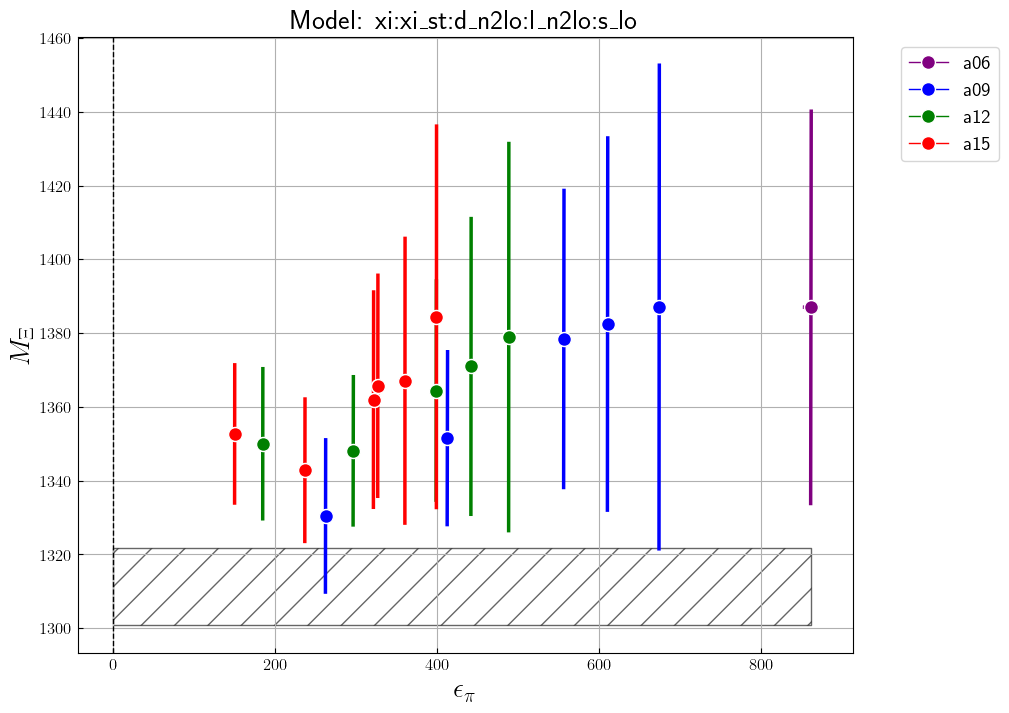

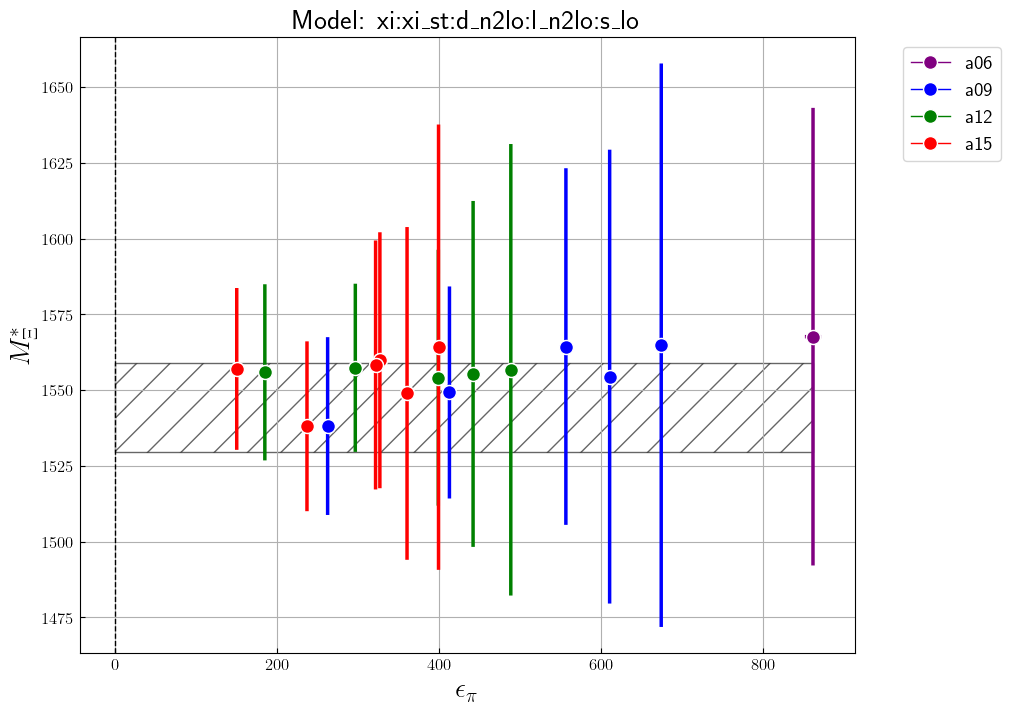

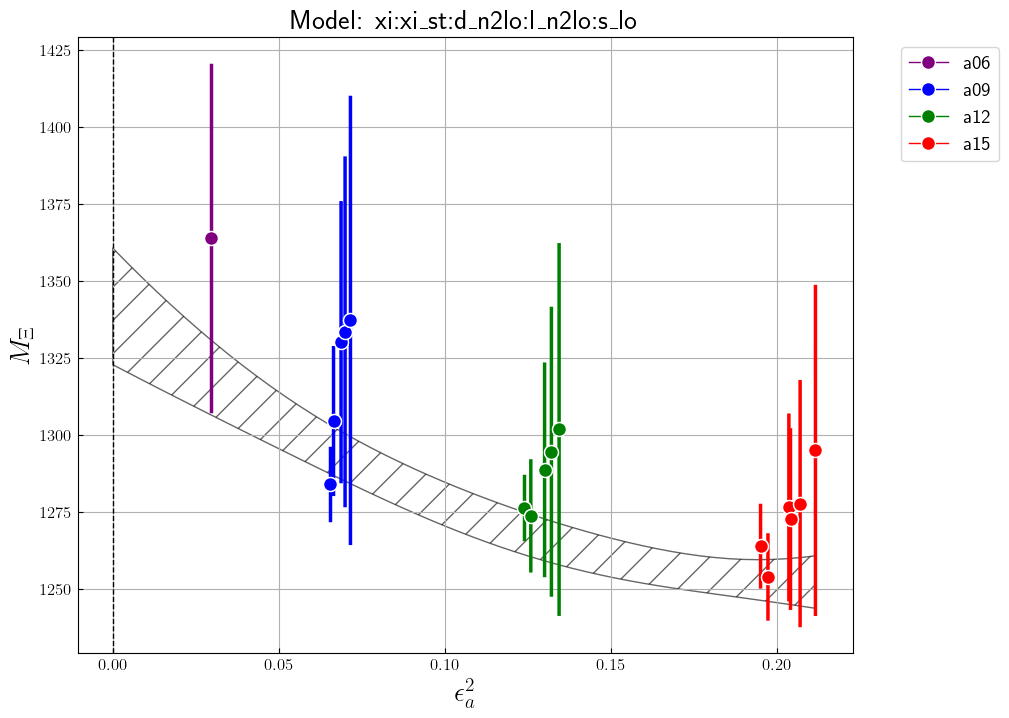

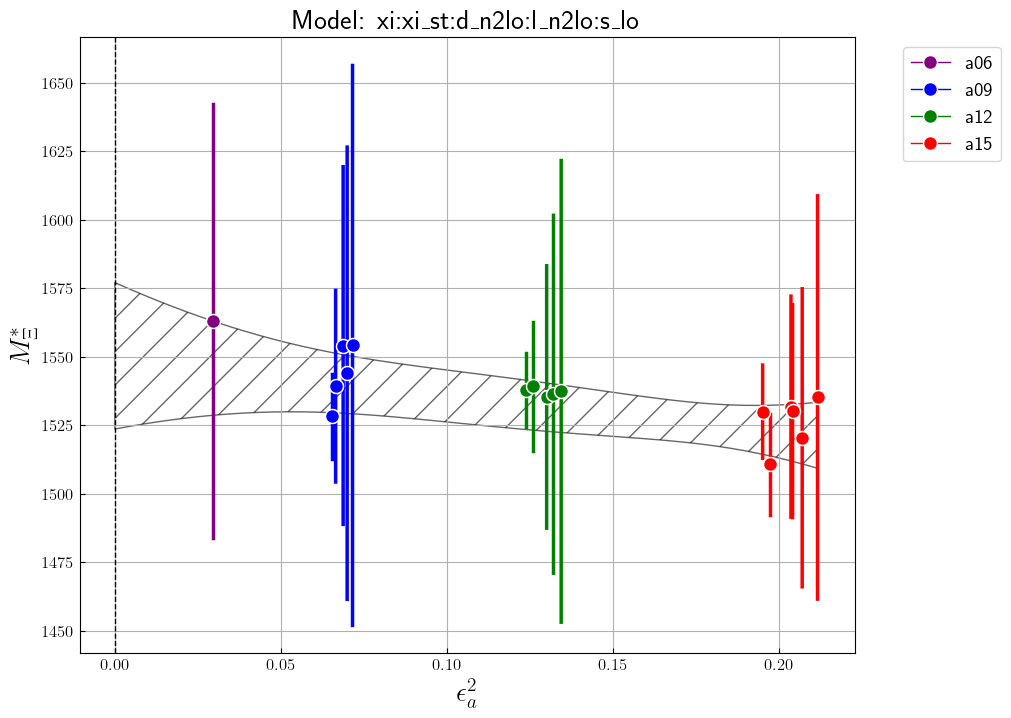

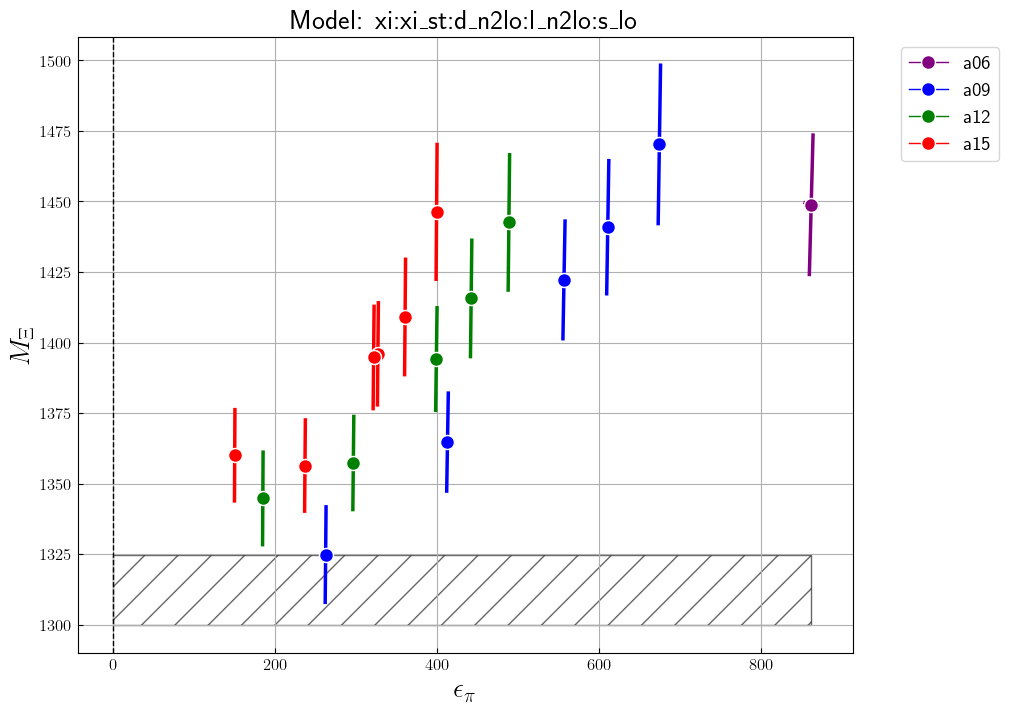

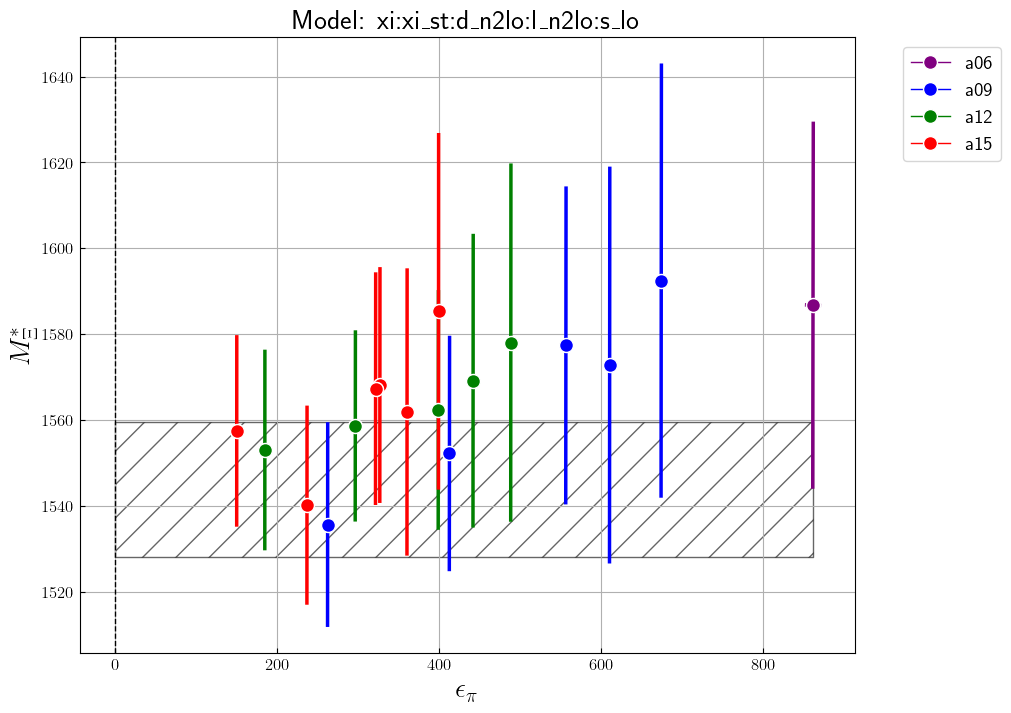

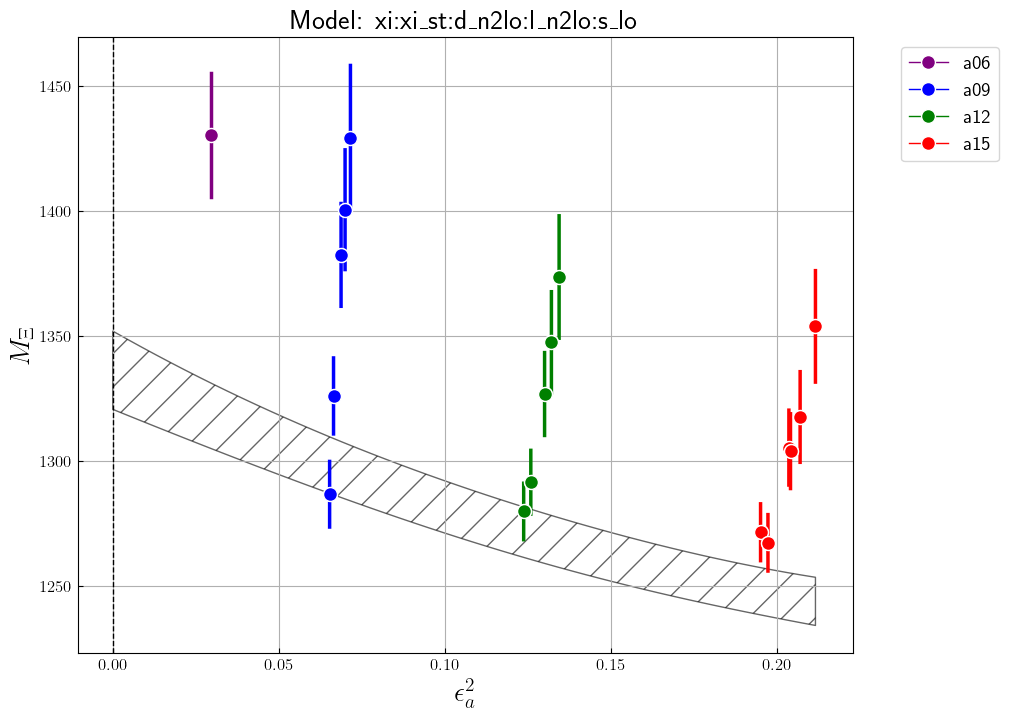

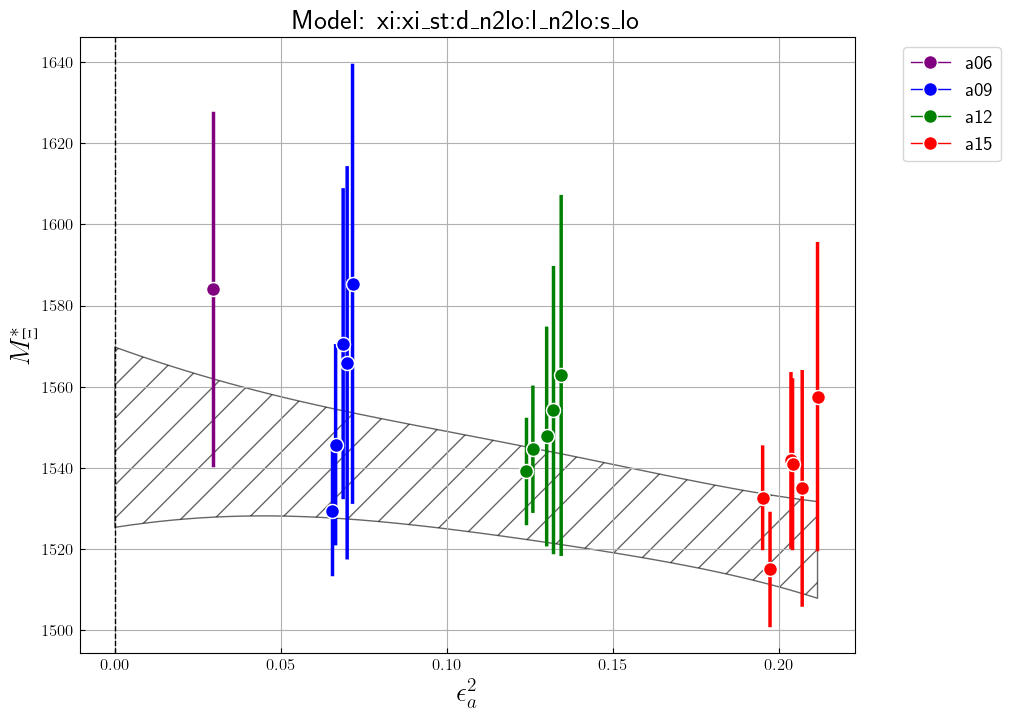

In [ ]:
reload(i_o)
reload(xfa)
reload(fit)

units_list = ['phys']
discard_cov_opt = [True,False] # this option either retains the correlations between the pseudoscalars (scale setting params) or removes them # 
model_data = {}
test_mdl_key = 'xi:xi_st:d_n2lo:l_lo:s_lo'

for unit in units_list:
    data, new_prior, phys_point_data = i_o.get_data_and_prior_for_unit(unit,system='xi',scheme='w0_imp',convert_data=False,decorr_scale=None)
    
    _model_info = xi_models[test_mdl_key].copy()
    _model_info['units'] = unit
    updated_mdl_key = i_o.update_model_key_name(test_mdl_key, unit)
# print(f"Processing: {updated_mdl_key}")  
    for dc in discard_cov_opt:
        xfa_instance = xfa.Xpt_Fit_Analysis(data=data,
                                        prior=new_prior,
                                        model_info=_model_info,
                                        phys_pt_data=phys_point_data,
                                        units=unit,
                                        extrapolate=True,
                                        discard_cov=dc,
                                        verbose=False,
                                        svd_test=False,
                                        svd_tol=None)
        config_key = f"{updated_mdl_key}_discardcov-{dc}"
        print(xfa_instance.fit.y)
        print(xfa_instance.shift_latt_to_phys(phys_params=['eps2_a','d_eps2_s','lam_chi','m_pi'], observable='xi',debug=True))
        model_data[config_key] = xfa_instance 
        print('\n')
        print('extrapolation as fcn of pion mass')
        xfa_instance.plot_params_fit(param='epi',observable='xi',eps=False)
        xfa_instance.plot_params_fit(param='epi',observable='xi_st',eps=False)
        xfa_instance.plot_params_fit(param='a',observable='xi',eps=False)
        xfa_instance.plot_params_fit(param='a',observable='xi_st',eps=False)


        print('extrapolation as fcn of lattice spacing') 


# Print the results
for key, value in model_data.items():
    # Extract the unit from the key assuming the unit was appended to the original key.
    unit_from_info = value.model_info['units']
    print(f"Results for {i_o.get_unit_description(unit_from_info)}:")
    print(key)
    print(value)
    # print("-" * 80)


2. Fit $M_H$ in physical units 
    - 2a. Work in MeV from outset 
    - 2b. Work in lattice units then convert to MeV at time of extrapolation 


{'m_xi': array([1411(13), 1283(11), 1320(11), 1372(11), 1389(11), 1412(11),
       1272.7(9.1), 1283.7(9.5), 1319.7(9.3), 1336.9(9.6), 1359.0(9.7),
       1259.3(8.4), 1258.8(8.4), 1295.5(8.5), 1289.3(8.9), 1303.4(9.6),
       1328.8(9.6)], dtype=object), 'm_xi_st': array([1644(18), 1528(15), 1565(19), 1621(20), 1632(26), 1673(14),
       1537(12), 1557(11), 1582(13), 1600(14), 1624(13), 1529(11),
       1520(13), 1559(10), 1556(11), 1556(13), 1585(13)], dtype=object), 'm_pi': array([327.9(2.8), 134.6(1.0), 221.6(1.7), 318.7(2.5), 357.4(2.8),
       409.7(3.2), 132.39(95), 219.5(1.5), 308.4(2.1), 349.8(2.4),
       398.3(2.7), 134.80(88), 216.9(1.4), 310.2(2.1), 307.1(2.0),
       348.1(2.3), 397.7(2.6)], dtype=object), 'm_k': array([562.3(4.9), 494.3(3.8), 517.4(4.0), 545.4(4.2), 558.8(4.3),
       577.4(4.4), 494.3(3.4), 507.8(3.5), 530.4(3.7), 545.6(3.8),
       561.8(3.9), 508.5(3.3), 507.8(3.3), 531.1(3.5), 530.0(3.5),
       543.6(3.6), 561.0(3.7)], dtype=object), 'lam_chi': arra

KeyboardInterrupt: 

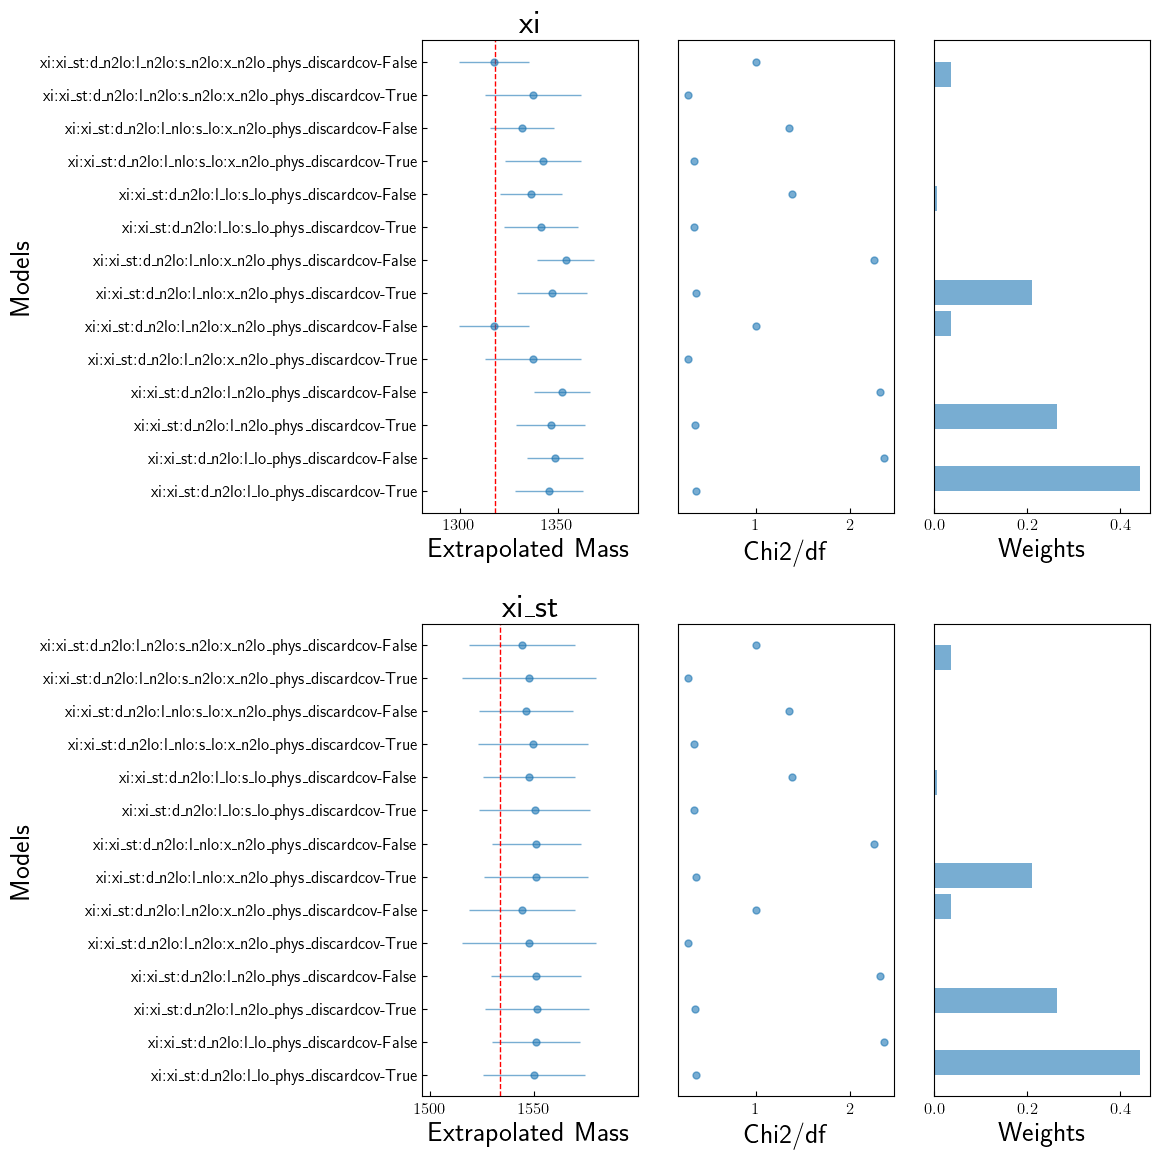

<Figure size 1000x1000 with 0 Axes>

In [ ]:
reload(xfa)
units_list = ['phys']
decorrelate_scale_opts = [True,False]
discard_cov_opt = [True,False] # this option either retains the correlations between the pseudoscalars (scale setting params) or removes them # 
model_data = {}
for unit in units_list:
    # for ds in decorrelate_scale_opts:
        data, new_prior, phys_point_data = i_o.get_data_and_prior_for_unit(unit,system='xi',scheme='w0_imp',convert_data=False,decorr_scale=None)
        print(data)
    
        for mdl_key in xi_models:
            _model_info = xi_models[mdl_key].copy()
            _model_info['units'] = unit
            updated_mdl_key = i_o.update_model_key_name(mdl_key, unit)
        # print(f"Processing: {updated_mdl_key}")  
            for dc in discard_cov_opt:
                xfa_instance = xfa.Xpt_Fit_Analysis(data=data,
                                                prior=new_prior,
                                                model_info=_model_info,
                                                phys_pt_data=phys_point_data,
                                                units=unit,
                                                extrapolate=True,
                                                discard_cov=dc,
                                                verbose=False,
                                                svd_test=False,
                                                svd_tol=None)
                config_key = f"{updated_mdl_key}_discardcov-{dc}"
            
                model_data[config_key] = xfa_instance  

# print(model_data['xi:xi_st:d_n2lo:l_lo_fpi'])

# Print the results
for key, value in model_data.items():
    # Extract the unit from the key assuming the unit was appended to the original key.
    unit_from_info = value.model_info['units']
    # print(f"Results for {i_o.get_unit_description(unit_from_info)}:")
    # print(key)
    # print(value)
    # print("-" * 80)

reload(compare)
compare_ = compare.ModelComparsion(models=model_data,compare_type='phys',units='phys')
compare_.compare_models(particles=['xi','xi_st'])
mdl_avg = compare_.model_average(particles=['xi','xi_st'])
print(mdl_avg)
compare_.model_plots(system='xi')

## $ \Lambda, \Sigma, \Sigma^*$ system ##

In [ ]:
reload(i_o)
input_output = i_o.InputOutput(units='phys',scheme='w0_org',system='lambda',convert_data=False)

# print(input_output.perform_svdcut())
data_test = input_output.perform_gvar_processing()

In [ ]:
reload(fit)
reload(i_o)
reload(xfa)
reload(compare)
test_model = 'lam:sigma:sigma_st:l_n2lo:d_n2lo:s_n2lo:x_n2lo_phys'

_model_info = lam_sigma_models[test_model]

xfa_instance = xfa.Xpt_Fit_Analysis(data=data_test,model_info=_model_info,
                                                extrapolate=True,discard_cov=True,verbose=True,svd_test=False,svd_tol=0.06)
print(xfa_instance)
# xfa_instance.svd_analysis()


# for mdl_key in lam_sigma_models:
#     _model_info = lam_sigma_models[mdl_key]
#     xfa_instance = xfa.Xpt_Fit_Analysis(model_info=_model_info,
#                                                 extrapolate=True,discard_cov=True,verbose=False,svd_test=False,svd_tol=0.06)
    
#     print(xfa_instance)
    
# lam_sigma_system = compare.ModelComparsion(verbose=True, models=xi_models)
# extrap_analysis_lam.plot_params(xparam='eps2_a',observables=['lambda','sigma','sigma_st'],show_plot=True,eps=False)
    # extrap_analysis.plot_params_fit(param='a',observable='xi',eps=False)
# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')

'''model average with lsqfitics'''
# y_fit_ = extrap_analysis.extrapolation()
# print(y_fit_)

# compare = compare.ModelComparsion(models=lam_sigma_models)
# compare.compare_models(particles=['lambda','sigma','sigma_st'])
# compare.model_average(particles=['lambda','sigma','sigma_st'])
# compare.model_plots()

TypeError: Xpt_Fit_Analysis.__init__() missing 3 required positional arguments: 'prior', 'phys_pt_data', and 'units'

# S=1,$\Lambda,\Sigma,\Sigma$* system in fpi units without scale setting ##
We can determine $M_H$ by fitting the dimensionless observable $\frac{M_H}{\Lambda_\Chi}$. In order to perform an extrapolation to the physical point, we subsequently multiply by $\Lambda_\Chi^*$, eg. the physical value. 
Differences between the following fit strategy and the fits obtained via directly fitting $M_H$ via scale setting, as previously performed:

    - Discertization and strange quark terms no longer need to be rescaled (eg. not multiplied through by $M_H^0$)
    - Need to take into account the $\Lambda_\Chi$ expansion, which depends on $F_\pi$ 
      - However, we can treat this llo term as a constant when performing a pure taylor fit (will differ by ensemble)
      - 


In [ ]:
reload(i_o)
priors = priors
input_output_fpi = i_o.InputOutput(units='fpi',scheme='w0_imp',system='lambda',convert_data=False)
# print(input_output.perform_svdcut())
data_fpi = input_output_fpi.perform_gvar_processing()

# test_model_fpi = 'lam:sigma:sigma_st:l_n2lo:d_n2lo:s_n2lo:x_n2lo_fpi'
test_model_fpi = 'lam:sigma:sigma_st:l_n2lo:d_n2lo_fpi'

_model_info_fpi = lam_sigma_models[test_model_fpi]
xfa_instance_fpi = xfa.Xpt_Fit_Analysis(data=data_fpi,model_info=_model_info_fpi,
                                                extrapolate=True,discard_cov=True,verbose=False,svd_test=False,svd_tol=0.06)
print(xfa_instance_fpi)

# prior_fpi = priors.get_prior(units='fpi')
# input_output = i_o.InputOutput(units='fpi',scheme='w0_org',system='lambda')
# # data_units_fpi
# reload(i_o)
# # print(input_output.perform_svdcut())
# data_test = input_output.perform_gvar_processing()
# dataa = input_output._get_bs_data()

# reload(xfa)
# reload(i_o)
# test_model = 'lam:sigma:sigma_st:l_n2lo:d_n2lo:s_n2lo:x_n2lo'
# _model_info = lam_sigma_models[test_model]
# xfa_instance = xfa.Xpt_Fit_Analysis(model_info=_model_info,
#                                                 extrapolate=True,discard_cov=True,verbose=False,svd_test=False,svd_tol=0.06)
# print(xfa_instance)
#     # xfa_instance.plot_params_fit(param='a',observable='lambda',eps=True)
    # xfa_instance.plot_params_fit(param='epi',observable='lambda',eps=True)

# lam_sigma_system_fpi = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
#                                 data=data_units_fpi, models=lam_sigma_models, prior=new_prior_fpi,project_path=data_dir)
# xi_system_fpi.model_plots(system='lam')
# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

Model: lam:sigma:sigma_st:l_n2lo:d_n2lo_fpi
---
Extrapolation:
Particle: lambda
mass: 1126.2(7.0) [PDG: 1115.7(6.0)]
---
Particle: sigma
mass: 1228.0(7.6) [PDG: 1193(24)]
---
Particle: sigma_st
mass: 1411.8(8.8) [PDG: 1383.7(1.0)]
---

---

Error Budget:
lambda
  stat    99.4%
  pp       0.6%
  disc     0.0%
  chiral   0.0%
sigma
  pp      77.6%
  stat    22.4%
  disc     0.0%
  chiral   0.0%
sigma_st
  stat    58.8%
  pp      41.2%
  disc     0.0%
  chiral   0.0%
Least Square Fit:
  chi2/dof [dof] = 4.5e+03 [51]    Q = 0    logGBF = -1.1324e+05

Parameters:
   m_{lambda,0}      0.97436 (20)       [       1.2 (1.0) ]  
     S_{lambda}      -0.0678 (39)       [       3.0 (2.0) ]  *
   b_{lambda,4}       -0.090 (27)       [       0.0 (5.0) ]  
   B_{lambda,4}       -8e-14 +- 5       [       0.0 (5.0) ]  
   d_{lambda,a}      -0.5298 (16)       [       0.0 (2.0) ]  
  d_{lambda,aa}       0.9295 (52)       [       0.0 (4.0) ]  
  d_{lambda,al}        2.321 (14)       [       0.0 (4.0) ]  


In [ ]:

# test_fit = fit.FitRoutine(model_info=_model_info,force_correlation=False,units='phys',scheme=
#                             svd_test=False, emp_bayes=None,empbayes_grouping=None,fv=False)

# print(test_fit)

xfa_instance = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
                                                extrapolate=True,force_correlation=True,
                                                discard_cov=True,verbose=False,truncate=True,svd_test=False,
                                                svd_tol=0.06)
# print(xfa_instance.test())

# xfa_instance_discard = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
#                                                 extrapolate=True,force_correlation=True,truncate=True,
#                                                 discard_cov=False,verbose=False,svd_test=False,svd_tol=0.09)

# xfa_instance_discard_svd = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
#                                                 extrapolate=True,force_correlation=True,truncate=False,
#                                                 discard_cov=False,verbose=False,svd_test=False,svd_tol=0.09)

# xfa_instance_svd = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
#                                                 extrapolate=True,force_correlation=True,truncate=False,
#                                                 discard_cov=False,verbose=False,svd_test=True,svd_tol=None)


# # xfa_instance_no_svd = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
# #                                                 extrapolate=True,force_correlation=False,discard_cov=False,
# #                                                 verbose=False,svd_test=False,svd_tol=0.09)
# # xfa_instance_no_svd_discard = xfa.Xpt_Fit_Analysis(model_info=_model_info,scheme='w0_org',units='phys',
#                                                 extrapolate=True,force_correlation=False,discard_cov=True,
#                                                 verbose=False,svd_test=False,svd_tol=0.09)
    # xi_fit_force = fit.FitRoutine(model_info=_model_info,emp_bayes=None,empbayes_grouping=None,svd_study=False)
    # svd_out = svd_fit.svd_diagnose
print(xfa_instance)
# print('\n')
# print(xfa_instance_discard)
# print(xfa_instance_discard_svd,'no svdcut')
# print(xfa_instance_svd)
    # print(xi_fit_force.fit,'force')
    # print(svd_out.plot_ratio(show=True))

TypeError: Xpt_Fit_Analysis.__init__() got an unexpected keyword argument 'scheme'

## Xi, Xi* system in physical units with scale setting ## 

In [ ]:
reload(xfa)
reload(fit)
import xpt.fit_comparison as compare 
for mdl_key in xi_models:
            _model_info = xi_models[mdl_key]
            xfa_instance = xfa.Xpt_Fit_Analysis(model_info=_model_info,units='phys',
                                                extrapolate=True,force_correlation=False,
                                                verbose=False,svd_test=True)
            # xfa_instance_force = xfa.Xpt_Fit_Analysis(model_info=_model_info,verbose=False
            # ,extrapolate=True)
            # print(xfa_instance)
            # print('force scale correlation:',xfa_instance_force)



xi_system = compare.ModelComparsion(verbose=True, models=xi_models)

TypeError: Xpt_Fit_Analysis.__init__() missing 4 required positional arguments: 'scheme', 'discard_cov', 'truncate', and 'svd_tol'

In [ ]:
for mdl_key in lam_sigma_models:
            _model_info = lam_sigma_models[mdl_key]
            xfa_instance_lam = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data,model_info=_model_info, prior=prior, project_path=data_dir, verbose=False
            ,extrapolate=True)
            # print(xfa_instance_lam)

lam_sigma_system = xfa.ModelComparsion(verbose=False, phys_point_data=phys_point_data,
                                data=data, models=lam_sigma_models, prior=new_prior,project_path=data_dir)
# lam_sigma_system.model_plots(system='lam_sigma')

## Xi, Xi* system in fpi units without scale setting ##
We can determine $M_H$ by fitting the dimensionless observable $\frac{M_H}{\Lambda_\Chi}$. In order to perform an extrapolation to the physical point, we subsequently multiply by $\Lambda_\Chi^*$, eg. the physical value. 
Differences between the following fit strategy and the fits obtained via directly fitting $M_H$ via scale setting, as previously performed:

    - Discertization and strange quark terms no longer need to be rescaled (eg. not multiplied through by $M_H^0$)
    - Need to take into account the $\Lambda_\Chi$ expansion, which depends on $F_\pi$ 
      - However, we can treat this llo term as a constant when performing a pure taylor fit (will differ by ensemble)
      - 


In [ ]:
prior_fpi = priors.get_prior(units='fpi')
input_output = i_o.InputOutput(project_path=data_dir)
data_units_fpi,ensembles = input_output.get_data(units='fpi')
new_prior_fpi = input_output.make_prior(data=data_units_fpi,prior=prior_fpi)
# data_units_fpi


In [ ]:
reload(xfa)
reload(fit)
for mdl_key in xi_models:
    xi_models[mdl_key]['units'] = 'fpi'
    model_info_ = xi_models[mdl_key]
    # print(model_info_)
    xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_units_fpi, 
                                            model_info=model_info_, prior=new_prior_fpi, 
                                            project_path=data_dir, verbose=True,extrapolate=False)
    print(xfa_instance)
    # xfa_instance.plot_params_fit(param='a',observable='xi',eps=True)
    # xfa_instance.plot_params_fit(param='epi',observable='xi',eps=True)

xi_system_fpi = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data_units_fpi, models=xi_models, prior=new_prior_fpi,project_path=data_dir)
xi_system_fpi.model_plots(system='xi')
# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

Model: xi:xi_st:d_n2lo:l_lo
---

Error Budget:
xi
  stat    99.7%
  disc     0.7%
  pp       0.2%
  chiral   0.1%
xi_st
  stat    99.9%
  disc     1.2%
  pp       0.0%
  chiral   0.0%
Least Square Fit:
  chi2/dof [dof] = 4.2 [34]    Q = 2.4e-15    logGBF = 45.893

Parameters:
       m_{xi,0}      1.13906 +- 0.00655422            [                   1 +- 1 ]  
         s_{xi}     -0.898532 +- 0.0748634            [                   0 +- 2 ]  
       d_{xi,a}     -0.531043 +- 0.0822341            [                  -2 +- 2 ]  
      d_{xi,aa}        1.10012 +- 0.284178            [                   2 +- 4 ]  
      d_{xi,al}        1.15348 +- 0.479777            [                   0 +- 5 ]  
    m_{xi_st,0}        1.24234 +- 0.010041            [                 1.1 +- 1 ]  
     s_{xi,bar}           8.13369e-12 +- 2            [                   0 +- 2 ]  
    d_{xi_st,a}         0.624111 +- 0.1508            [                   0 +- 2 ]  
   d_{xi_st,aa}      -0.983201 +- 0.531639 

KeyError: 'a_{xi,4}'

<Figure size 1000x1000 with 0 Axes>

Model: lam:sigma:sigma_st:l_lo:d_n2lo
---

Error Budget:
lambda
  stat    98.0%
  disc     8.9%
  chiral   0.3%
  pp       0.1%
sigma
  stat    95.5%
  disc     8.3%
  pp       1.2%
  chiral   0.3%
sigma_st
  stat    99.3%
  disc    18.5%
  chiral   0.9%
  pp       0.3%
Least Square Fit:
  chi2/dof [dof] = 1.8 [51]    Q = 0.00035    logGBF = 116.6

Parameters:
   m_{lambda,0}     0.975829 +- 0.00642529            [                 1.2 +- 1 ]  
     s_{lambda}      -0.565429 +- 0.244281            [                   0 +- 5 ]  
   d_{lambda,a}     -0.361892 +- 0.0881187            [                   0 +- 5 ]  
  d_{lambda,aa}        0.15371 +- 0.361772            [                   0 +- 5 ]  
  d_{lambda,al}         4.39785 +- 1.33544            [                   0 +- 5 ]  
    m_{sigma,0}      1.04166 +- 0.00631149            [                 1.3 +- 1 ]  
      s_{sigma}       -1.58759 +- 0.210841            [                   0 +- 5 ]  
    d_{sigma,a}     -0.225407 +- 0.0921231

KeyError: 'undefined key: m_{lambda,0}'

### $F_\pi$ Fit ###

Needed for $\frac{M_H}{\Lambda_\Chi}$ llo chiral term expansion and sigma term determination 

In [ ]:
fpi_models = models['models']['fpi']
model_info_fpi = fpi_models['fpi:l_n2lo:d_n2lo:x_n2lo']
fit_fpi = fpi_fit.fit_routine(prior=new_prior, data=data, model_info=model_info_fpi)
fit_fpi_out = fit_fpi.fit
extrap_fpi = fpi_fit.Fpi(datatag='Fpi',model_info=model_info_fpi)
extrap = extrap_fpi.fitfcn(p=fit_fpi_out.p)
#print(fit_fpi_out)
print( '\n','ens:',ensembles,'\n','extrapolation:',extrap, '\n',fit_fpi_out.format(True))
#print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_fpi_out)

KeyError: 'Fpi'

In [ ]:
reload(xfa)
for mdl_key in xi_models:
    xi_models[mdl_key]['units'] = 'fpi'
    model_info_ = xi_models[mdl_key]
    print(model_info_)
    xfa_instance = xfa.Xpt_Fit_Analysis(phys_point_data=phys_point_data, data=data_units_fpi, 
                                            model_info=model_info_, prior=new_prior_fpi, 
                                            project_path=data_dir, verbose=False,extrapolate=False)
    # print(xfa_instance)
    xfa_instance.plot_params_fit(param='a',observable='xi',eps=True)
    xfa_instance.plot_params_fit(param='epi',observable='xi',eps=True)


# xfa_instance.plot_params(xparam='mpi_sq',observables=['xi','xi_st'],show_plot=True,units='gev')
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi'],show_plot=True,eps=True)
# xfa_instance.plot_params(xparam='eps2_a',observables=['xi_st'],show_plot=True,eps=True)

# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')
    

{'name': 'xi:xi_st:d_n2lo:l_lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': None, 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'lo', 'xpt': False, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': None, 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'n2lo', 'xpt': False, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo:x_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': 'n2lo', 'order_disc': 'n2lo', 'order_strange': 'n2lo', 'order_light': 'n2lo', 'xpt': True, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_nlo:x_n2lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chiral': 'n2lo', 'order_disc': 'n2lo', 'order_strange': None, 'order_light': 'nlo', 'xpt': True, 'fv': True, 'units': 'fpi'}
{'name': 'xi:xi_st:d_n2lo:l_n2lo:s_lo', 'particles': ['xi', 'xi_st'], 'eps2a_defn': 'w0_imp', 'order_chi

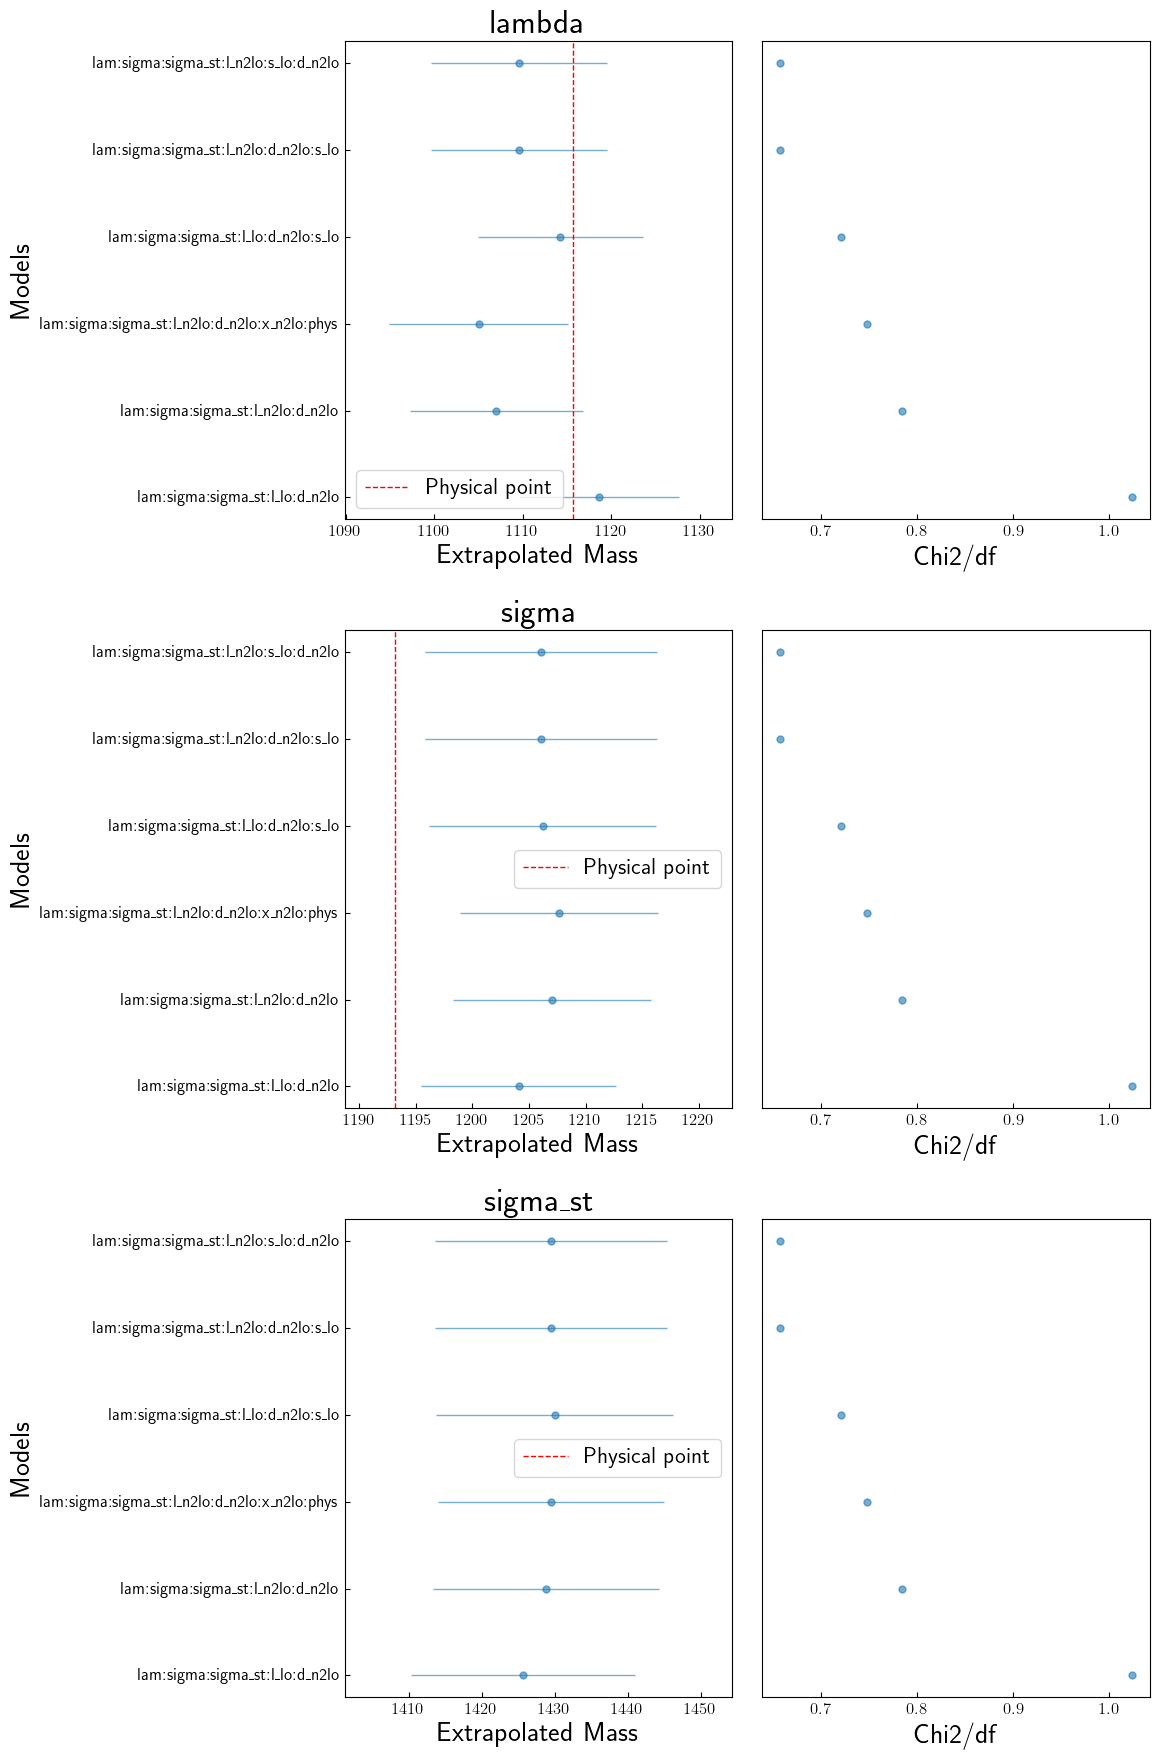

In [ ]:
reload(xfa)
reload(fit)
import lsqfitics
for mdl_key in lam_sigma_models:
    model_info_ = lam_sigma_models[mdl_key]
    # try:
    extrap_analysis_lam = xfa.Xpt_Fit_Analysis(verbose=True, phys_point_data=phys_point_data,
                            data=data, model_info=model_info_, prior=new_prior,project_path=data_dir)
    fit_out_lam = extrap_analysis_lam.fit
#     # print(fit_out_lam)
#     print(extrap_analysis_lam)
    # except Exception as e:
    #     print(f"Error encountered for Model: {mdl_key}")
    #     print(f"Error details: {e}")
    #     continue
    
# extrap_analysis.plot_params(xparam='mpi_sq',observables='xi',show_plot=True,units='gev')
extrap_analysis_lam.plot_params(xparam='eps2_a',observables=['lambda','sigma','sigma_st'],show_plot=True,eps=False)
    # extrap_analysis.plot_params_fit(param='a',observable='xi',eps=False)
# extrap_analysis.plot_params_fit(param='mpi_sq',observable='xi')

'''model average with lsqfitics'''
# y_fit_ = extrap_analysis.extrapolation()
# print(y_fit_)

compare = xfa.ModelComparsion(verbose=True, phys_point_data=phys_point_data,
                                data=data, models=lam_sigma_models, prior=new_prior,project_path=data_dir)
compare.compare_models(particles=['lambda','sigma','sigma_st'])
compare.model_average(particles=['lambda','sigma','sigma_st'])
compare.model_plots()

In [ ]:
# model_info_fpi = xi_models['xi:xi_st:d_n2lo:l_n2lo:x_n2lo:fpi']
# # fpi units # 
# xi_fit_fpi = fit.FitRoutine(prior=prior_fpi,data=data_units_fpi, project_path=data_dir,model_info=model_info_fpi,
#                     phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None)
# # print(xi_fit_fpi)
# # print(xi_fit_fpi.extrapolation(observables=['sigma_pi','mass'],data=phys_point_data))
# extrap_analysis_fpi = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
#                                 data=data_units_fpi, model_info=model_info_fpi, prior=new_prior_fpi,project_path=data_dir)
# print(extrap_analysis_fpi)



### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation


In [ ]:
model_info_lam = lam_sigma_models['lam:sigma:sigma_st:l_n2lo:d_n2lo:x_n2lo:phys']
lam_fit = fit.FitRoutine(prior=prior,data=data, project_path=data_dir,model_info=model_info_lam,
                    phys_point_data=phys_point_data, emp_bayes=None,empbayes_grouping=None)

# print(lam_fit)
# print(lam_fit.extrapolation(observables=['sigma_pi','mass'],data=phys_point_data))

In [ ]:
reload(i_o)
xi_out = xi_fit.fit
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = xi_out.p['m_{xi,0}']
e_pi = m_pi / lam_chi
# sigma = m_pi**2 *gv.deriv(m_proton, e_pi**2)
# print(sigma)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton
term_1 = lam_chi * e_pi/2 * m_proton * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
# sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'xi_fit' is not defined

In [ ]:

importlib.reload(xfa)
importlib.reload(fit)
importlib.reload(i_o)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.Xpt_Fit_Analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior,project_path=data_dir)
    fit_out = extrap_analysis.fit
    for part in mdl_info['particles']:
        extrap_analysis.plot_params(observable=part,xparam='eps2_a',show_plot=True)
        print(f"Model: {mdl_key}")
        # print(fit_out)

    # print(extrap_analysis)

        # return fit_out

with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
xi_models = models['models']['xi_system']
for mdl_key in xi_models:
    # mdl_info = xi_models[mdl_key]
    try:
        perform_fit_and_plot(xi_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    


In [ ]:
from scipy.interpolate import interp1d
importlib.reload(xfa)

def perform_fit_and_plot(model_type,mdl_key):
    mdl_info = model_type[mdl_key]
    extrap_analysis = xfa.fit_analysis(verbose=False, phys_point_data=phys_point_data,
                                data=data, model_info=mdl_info, prior=new_prior)
    fit_out = extrap_analysis.fit
    print(fit_out)
    print(f"Model: {mdl_key}")
    print(extrap_analysis)

    # x_data = [gv.mean(x) for x in extrap_analysis.fit.p['eps2_a']]
    # for part in mdl_info['particles']:
    #     y_data = [gv.mean(y) for y in extrap_analysis.fit.y[part]]

    # y_fit = interp1d(x_data, y_data, kind='cubic', fill_value='extrapolate')

    # x_fit = np.linspace(-0.1, 0.1, 100)
    # y_fit_vals = [y_fit(x) for x in x_fit]

    # plt.plot(x_fit, y_fit_vals, label=f"{mdl_key}")
    # plt.fill_between(x_fit, [y - gv.sdev(y) for y in y_fit_vals], [y + gv.sdev(y) for y in y_fit_vals], alpha=0.5)

    # plt.axvline(0, ls='--', color='black', label='phys. point')
    # y_phys = np.mean([gv.gvar(g) for g in ['1314.86(20)', '1321.71(07)']])
    
    # plt.plot(0, gv.mean(y_phys), marker='o', mec='w', zorder=0.2, color='black')

    # plt.xlabel("$\epsilon_a^2$")
    # plt.ylabel("$m_\Xi(MeV)$")
    # plt.legend()
    # plt.grid()
    # plt.show()
    return fit_out


In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    try:
        perform_fit_and_plot(lam_sig_models,mdl_key)
    except Exception as e:
        print(f"Error encountered for Model: {mdl_key}")
        print(f"Error details: {e}")
        continue
    

In [ ]:
lam_sig_models = models['models']['lam_sigma_system']
model_info = lam_sig_models['lam:sigma:sigma_st:l_lo:d_n2lo:s_lo']
my_fit = fit.FitRoutine(phys_point_data=phys_point_data,emp_bayes=None,empbayes_grouping=None,
                                data=data,model_info=model_info,prior=new_prior)
lam_sigma_sys_out = my_fit.fit
plot_params(fit=lam_sigma_sys_out,yparam='lambda')

In [ ]:
lam_sigma_fit = perform_fit_and_plot(model_type=mod)
plot_params()

### Lambda, Sigma, Sigma_star SU(2) hbxpt extrapolation

In [ ]:
with open('../xpt/models.yaml', 'r') as f:
    models = yaml.load(f, Loader=yaml.FullLoader)
lam_sig_models = models['models']['lam_sigma_system']
for mdl_key in lam_sig_models:
    perform_fit_and_plot(lam_sig_models,mdl_key)